# Volcanic Impact in Obs

* Wenchang Yang (wenchang@princeton.edu)
* Department of Geosciences, Princeton University

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd

import geoxarray
from geoplots import mapplot
import xlearn
from climindex import get_climate_index
from geoplots import xticksmonth

!date
%matplotlib notebook

Tue Mar 27 16:56:44 EDT 2018


In [2]:
das = dict()
ncfile = '/tigress/wenchang/data/cru/cru_ts3.25.1901.2016.pre.dat.nc'
data_name = 'pre'
lons_sahel = slice(-20,10)
lats_sahel = slice(10,20)

In [3]:
ds = xr.open_dataset(ncfile)
da = ds[data_name]
# anomaly from clim
da_clim = da.groupby('time.month').mean('time')
da = da.groupby('time.month') - da_clim
da = da.resample(time='MS').mean('time')

ts = da.sel(lon=lons_sahel, lat=lats_sahel).geo.fldmean().load() # Sahel-mean 

## Agung 1963

In [4]:
# raw data
year_erupt = 1963
years_before = slice(f'{year_erupt - 5}', f'{year_erupt - 1}')
years_after = slice(f'{year_erupt}', f'{year_erupt + 2}')
units = 'mm/day'

damean = da.sel(time=years_before).groupby('time.month').mean('time')
daa = da.sel(time=years_after).groupby('time.month') - damean # anomaly
daa = daa.resample(time='QS-Dec').mean('time').isel(time=slice(1,None)) # seasonal mean
das['pre.anom.agung'] = daa

<IPython.core.display.Javascript object>


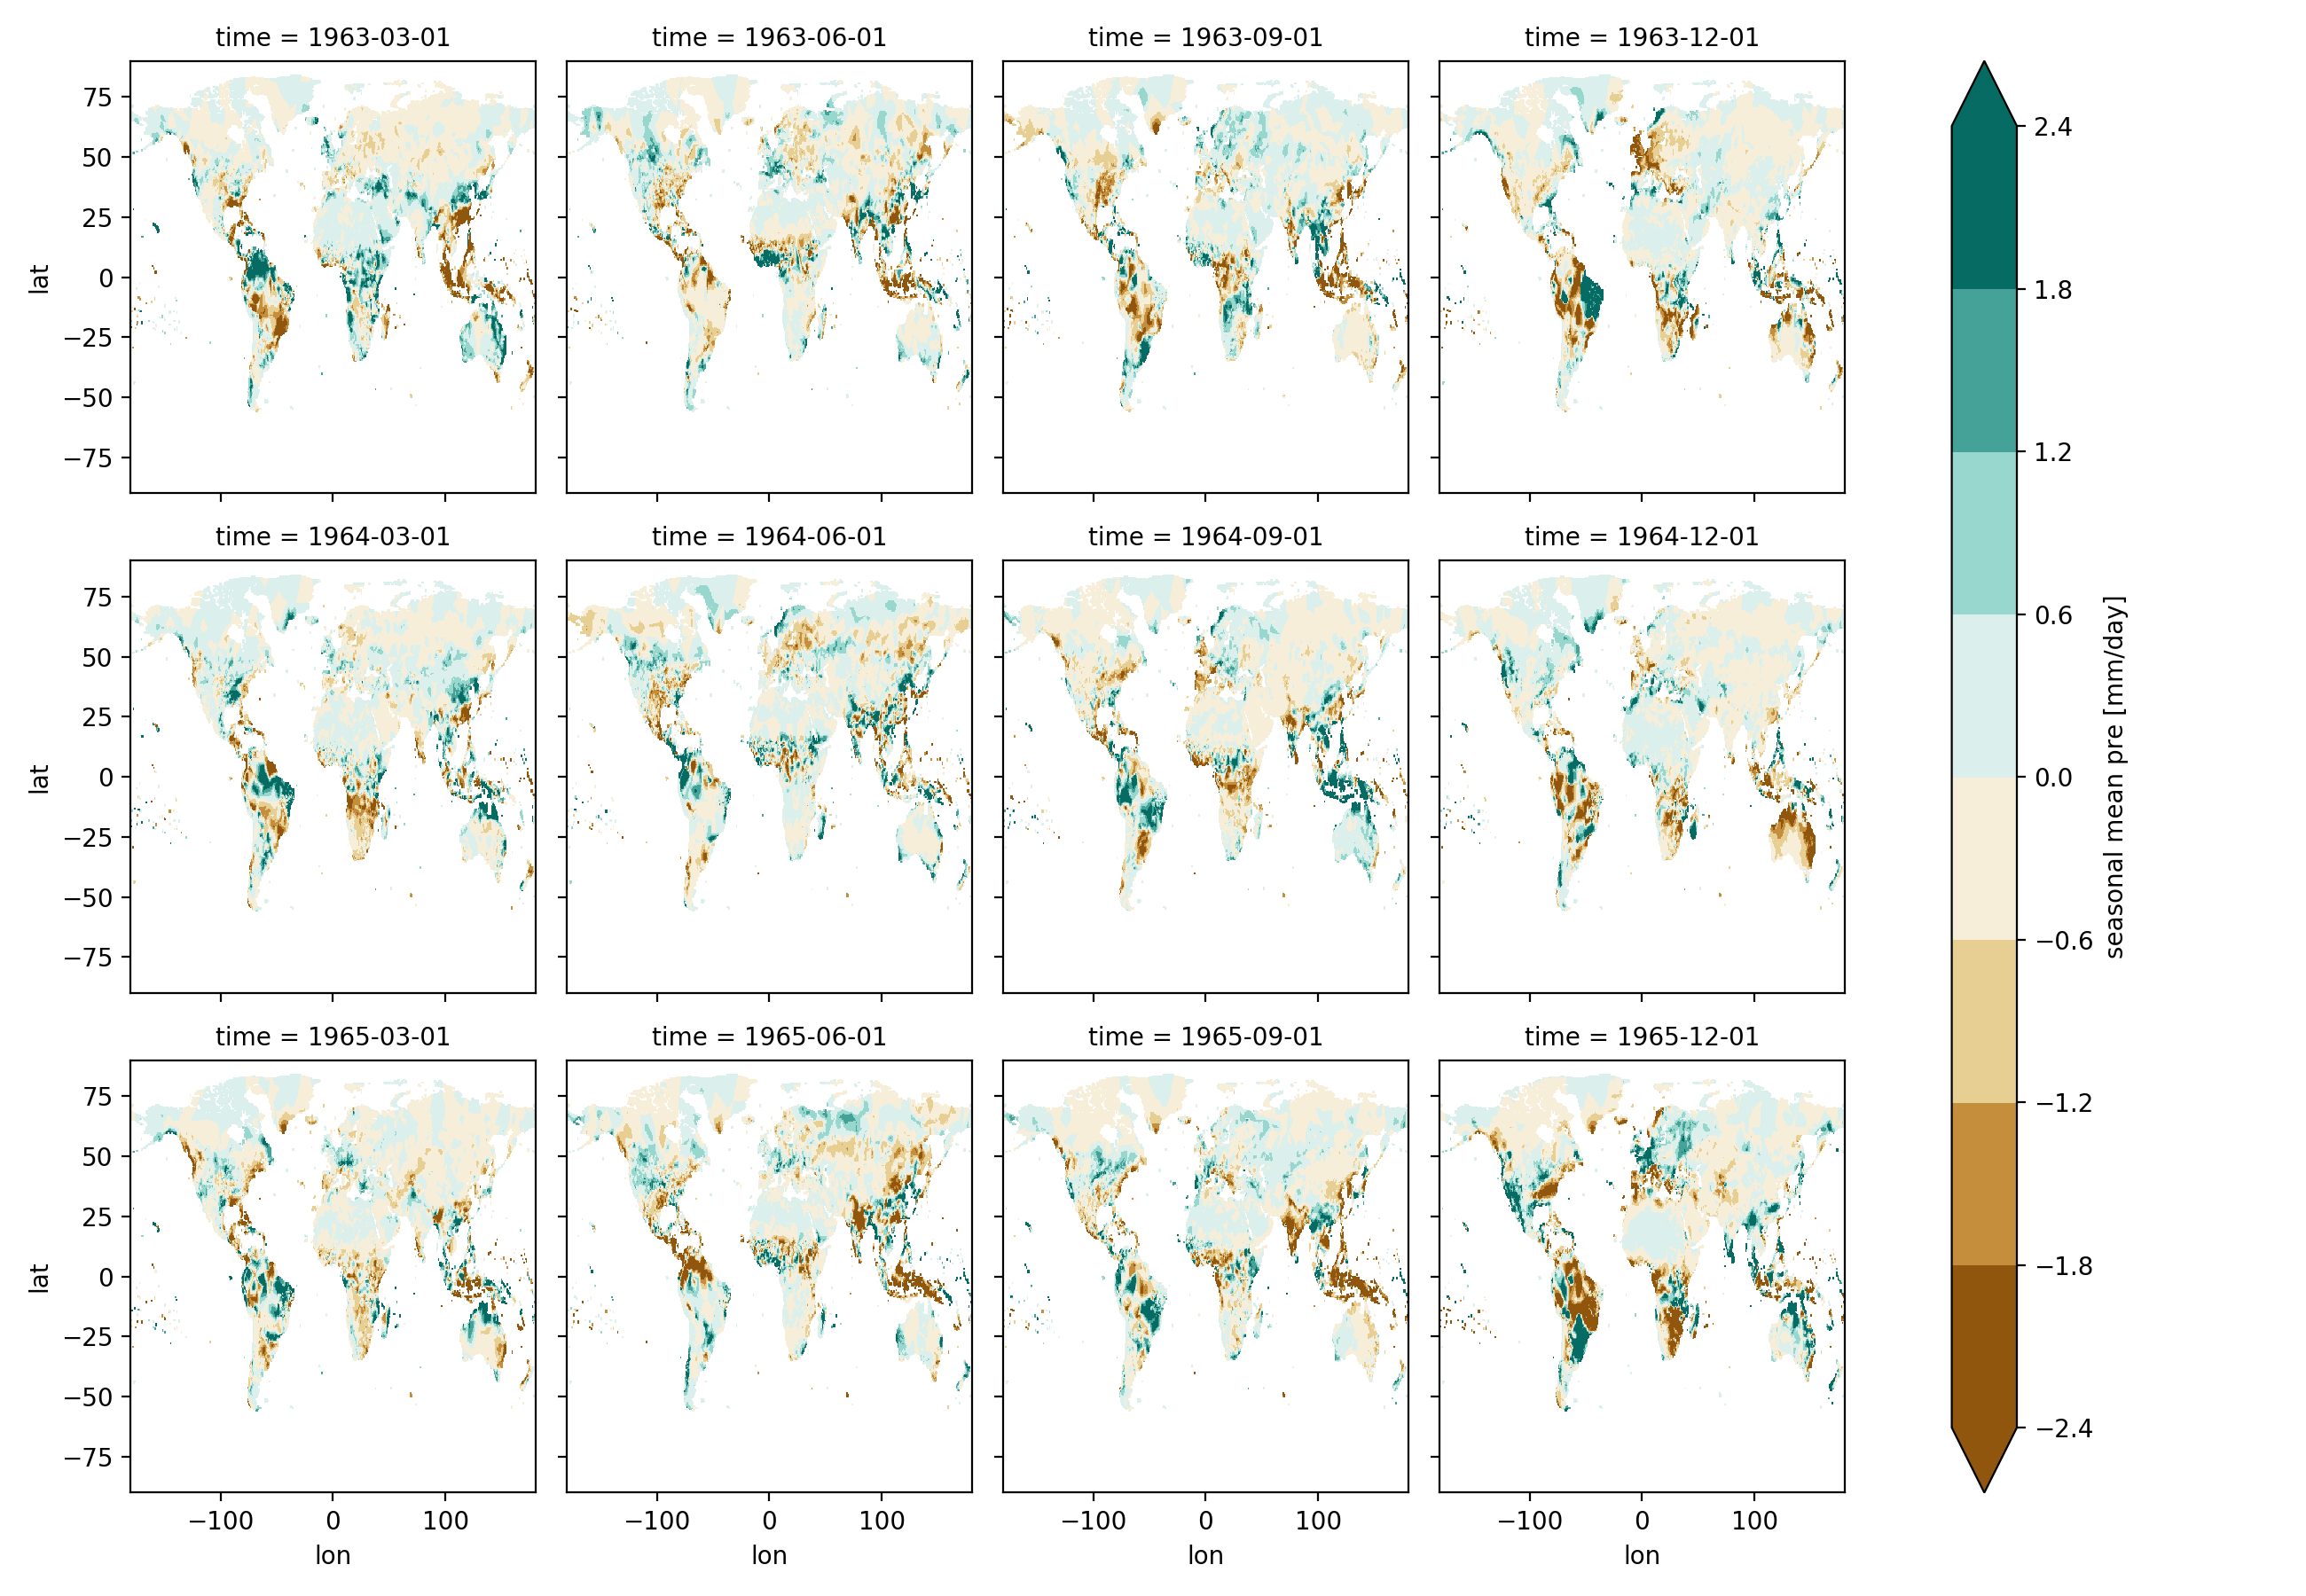

In [5]:
daa.pipe(lambda x: x/30.0).rename(f'seasonal mean {data_name} [{units}]')\
    .plot(col='time', col_wrap=4, robust=True, levels=10, cmap='BrBG')

<IPython.core.display.Javascript object>


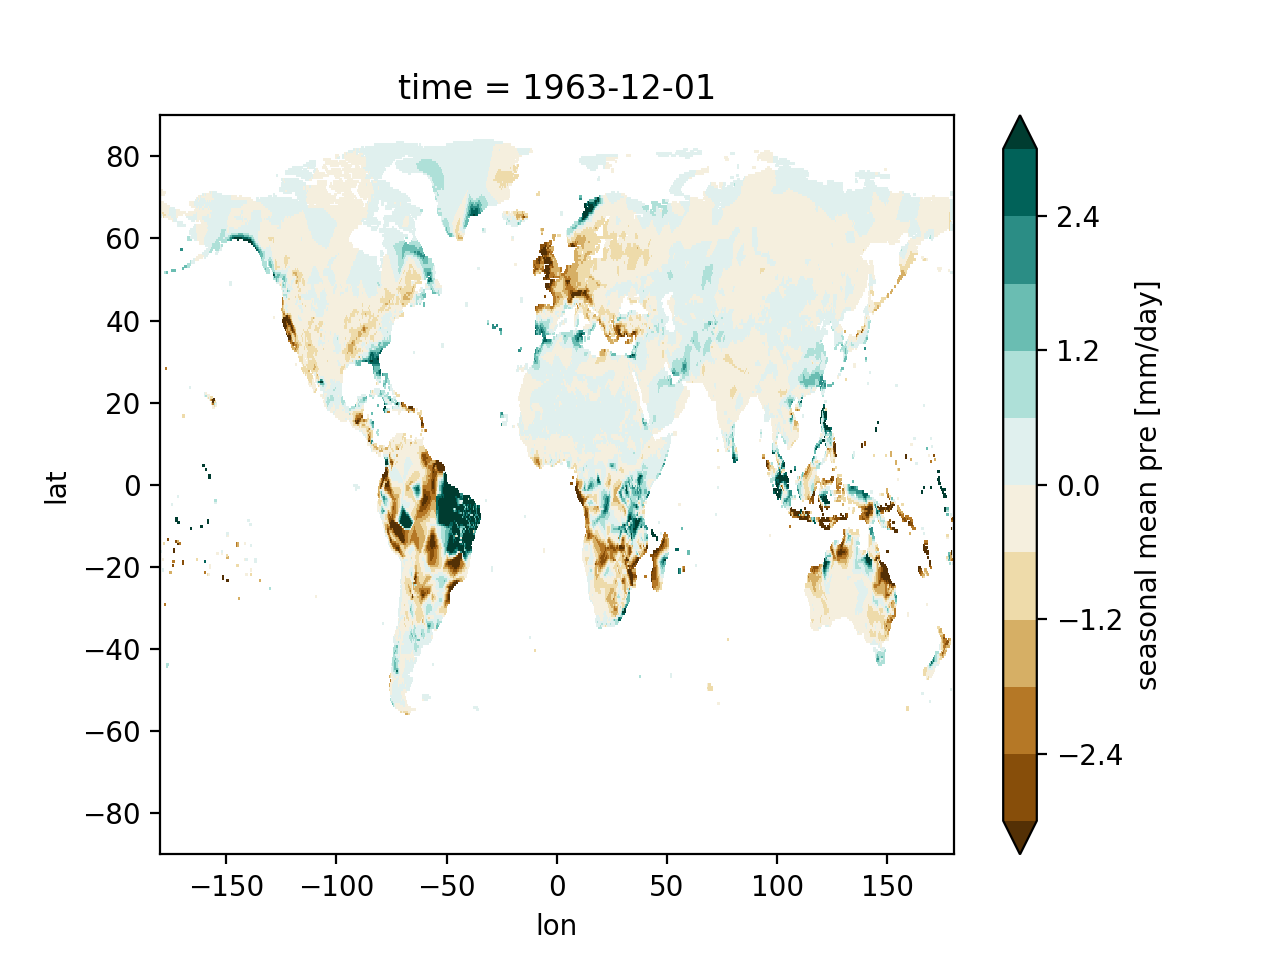

In [6]:
# following winter
daa.sel(time=f'{year_erupt}-12').pipe(lambda x: x/30.0).rename(f'seasonal mean {data_name} [{units}]')\
    .plot(robust=True, levels=10, cmap='BrBG')

<IPython.core.display.Javascript object>


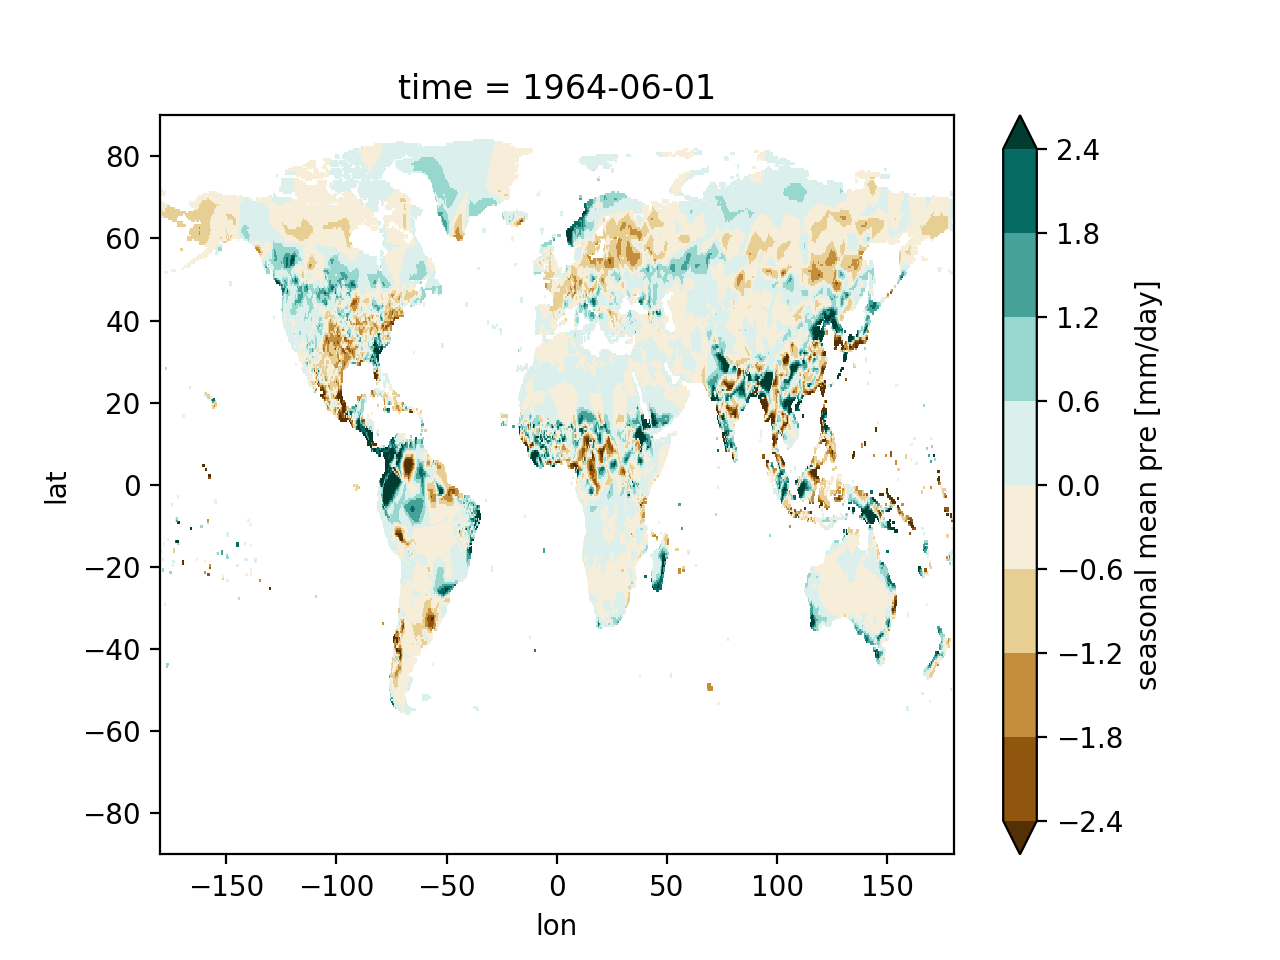

In [7]:
# next-year summer
daa.sel(time=f'{year_erupt+1}-06').pipe(lambda x: x/30.0).rename(f'seasonal mean {data_name} [{units}]')\
    .plot(robust=True, levels=10, cmap='BrBG')

<IPython.core.display.Javascript object>


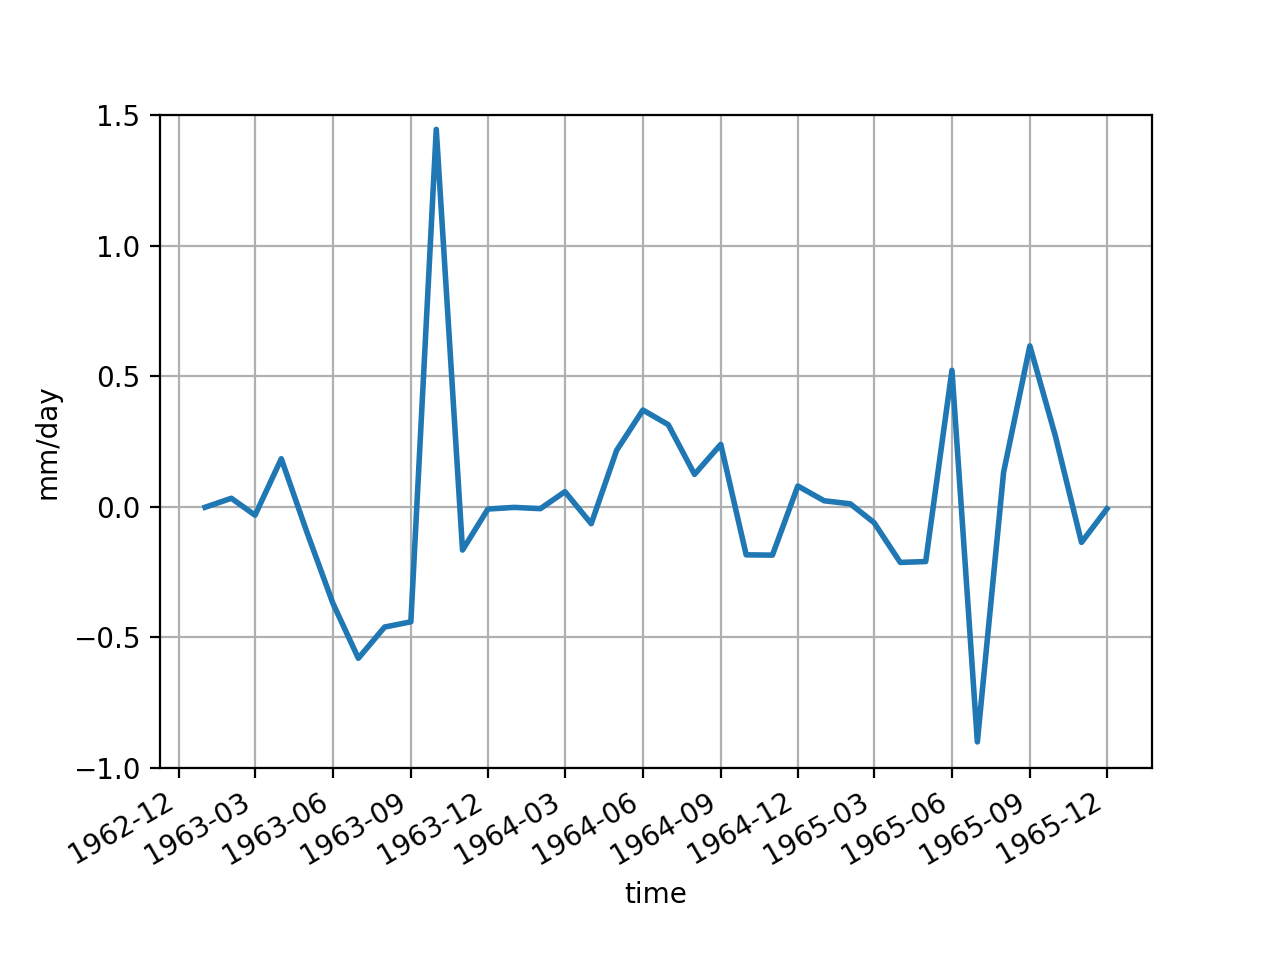

(-1, 1.5)

In [8]:
# Sahel rainfall time series
ts_ = ts.sel(time=years_after).groupby('time.month') \
    - ts.sel(time=years_before).groupby('time.month').mean('time') # anomaly
ts_.pipe(lambda x: x/30.).plot()
xticksmonth(range(3,13,3))
plt.grid(True)
plt.ylabel(units)
plt.ylim(-1,1.5)

## Chichon 1982

In [9]:
year_erupt = 1982
years_before = slice(f'{year_erupt - 5}', f'{year_erupt - 1}')
years_after = slice(f'{year_erupt}', f'{year_erupt + 2}')
units = 'mm/day'

damean = da.sel(time=years_before).groupby('time.month').mean('time')
daa = da.sel(time=years_after).groupby('time.month') - damean
daa = daa.resample(time='QS-Dec').mean('time').isel(time=slice(1,None))
das['pre.anom.chichon'] = daa

<IPython.core.display.Javascript object>


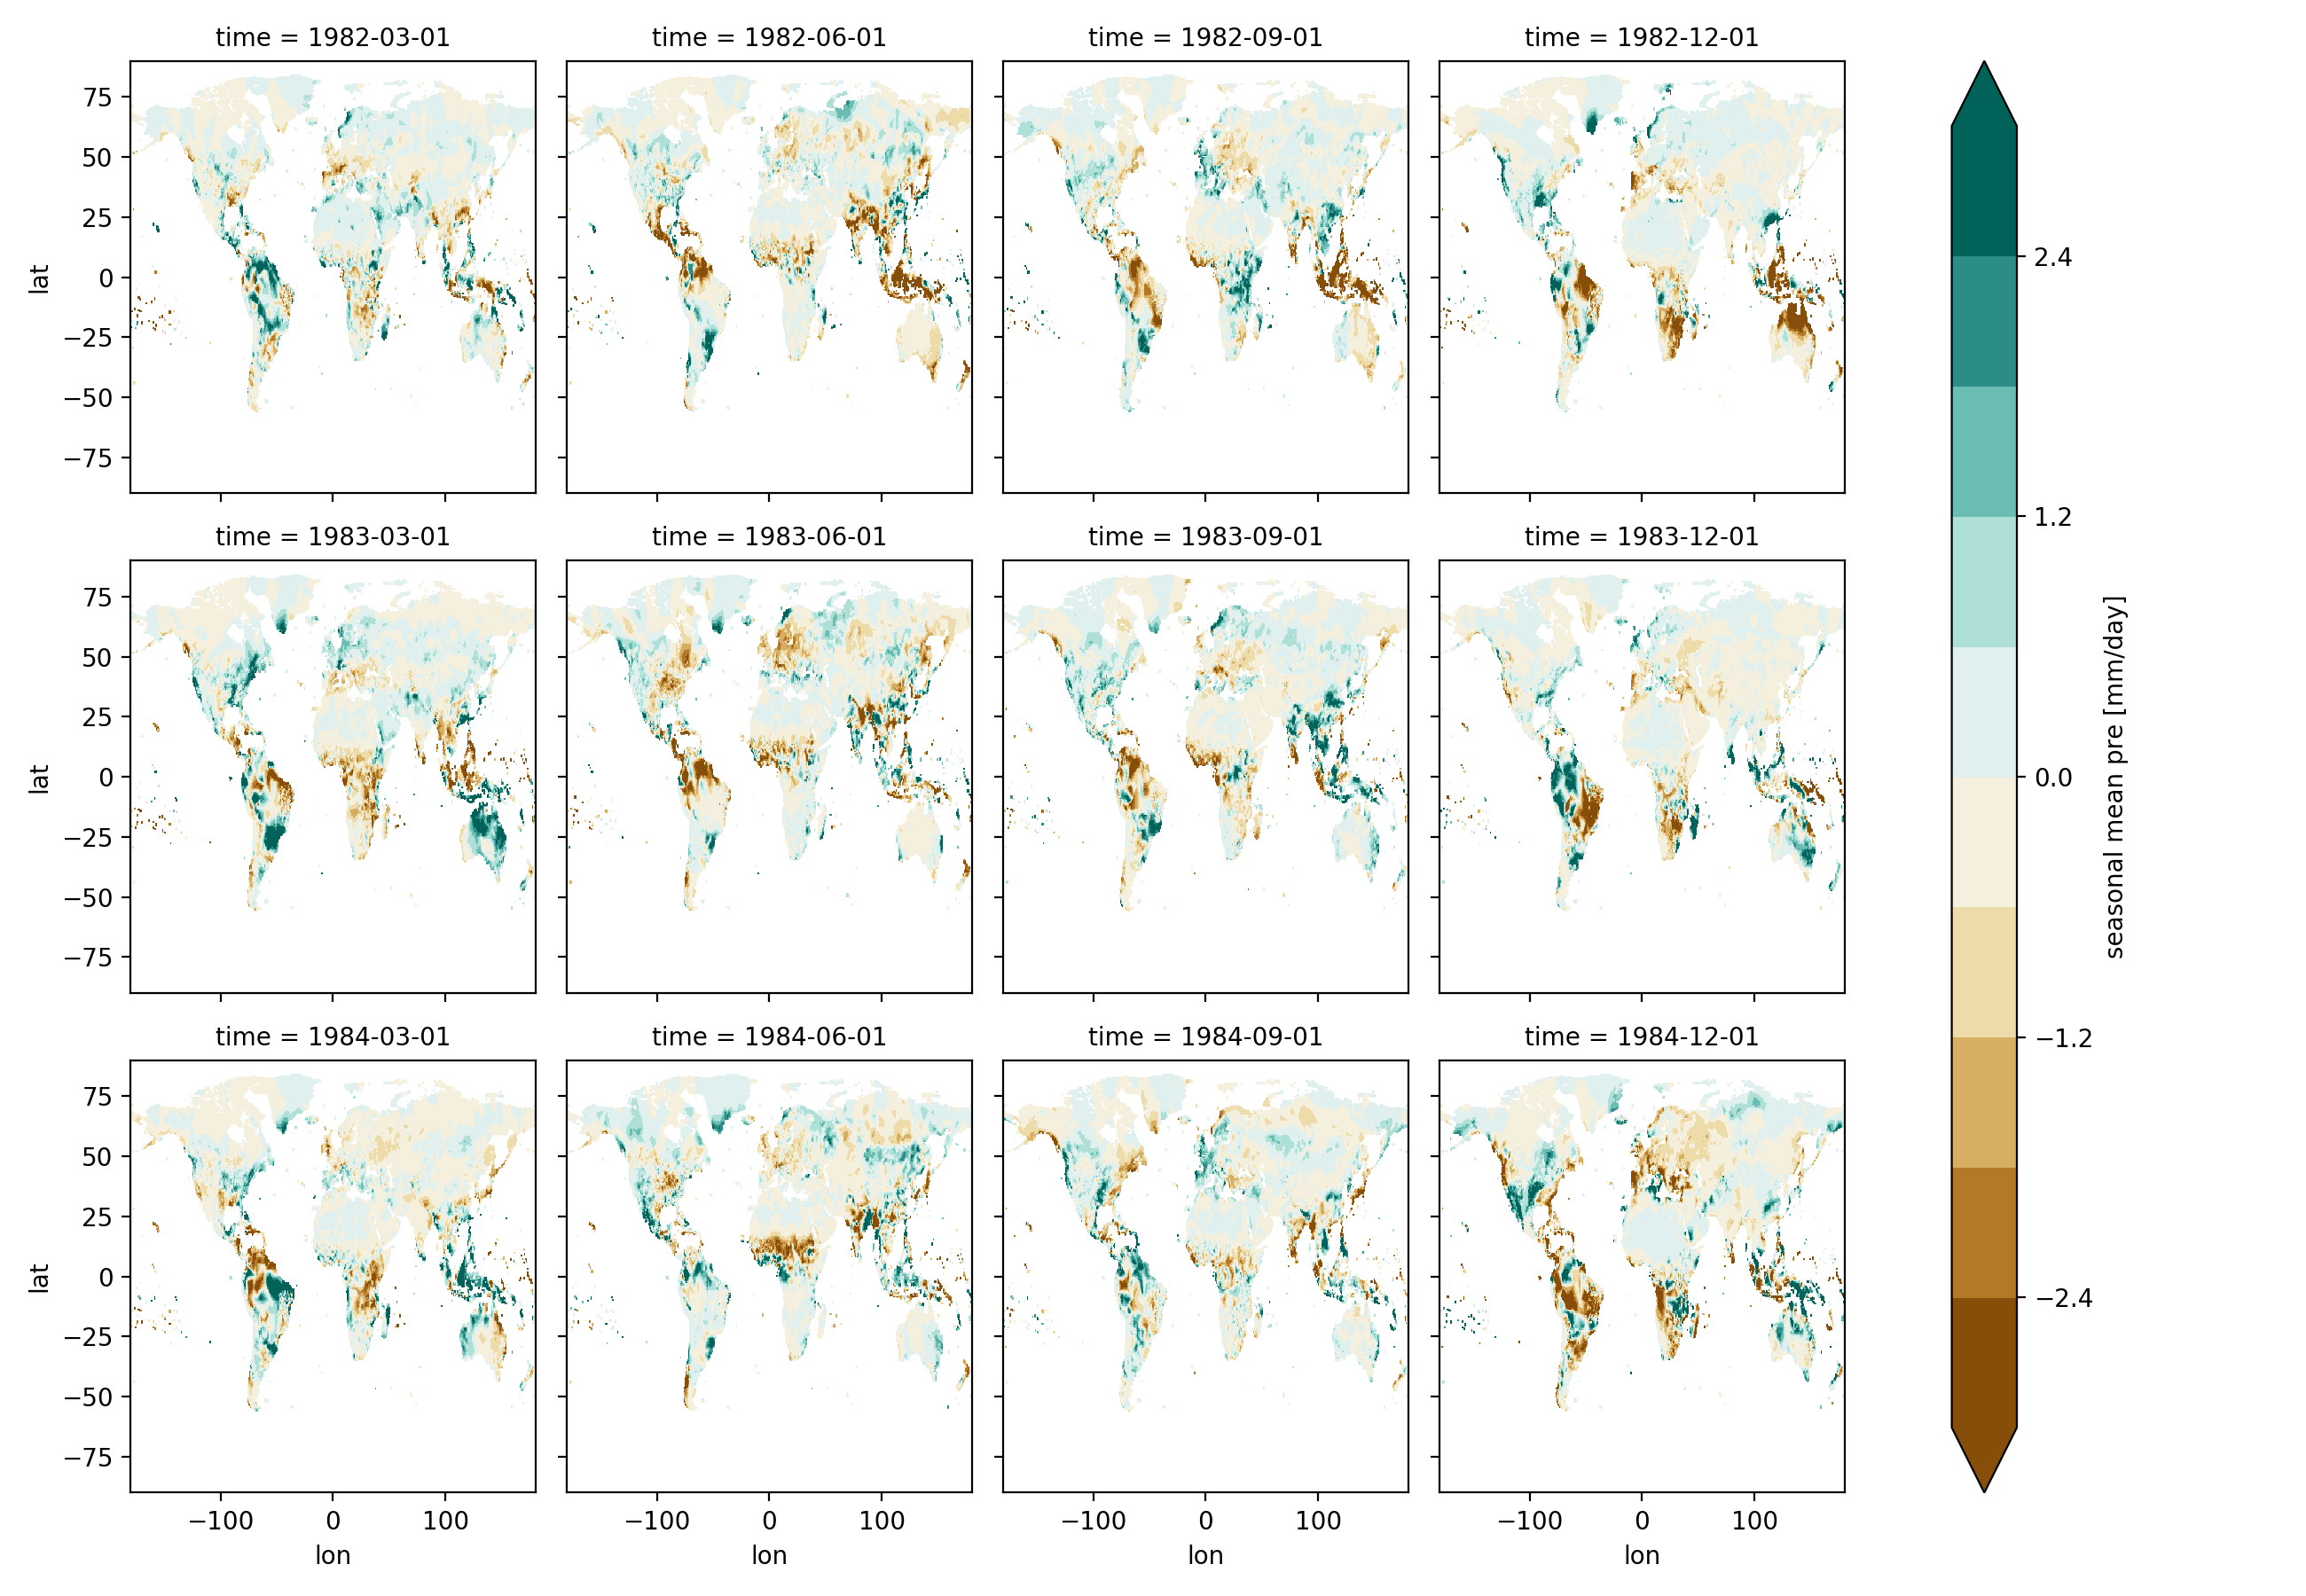

In [10]:
daa.pipe(lambda x: x/30.0).rename(f'seasonal mean {data_name} [{units}]')\
    .plot(col='time', col_wrap=4, robust=True, levels=10, cmap='BrBG')

<IPython.core.display.Javascript object>


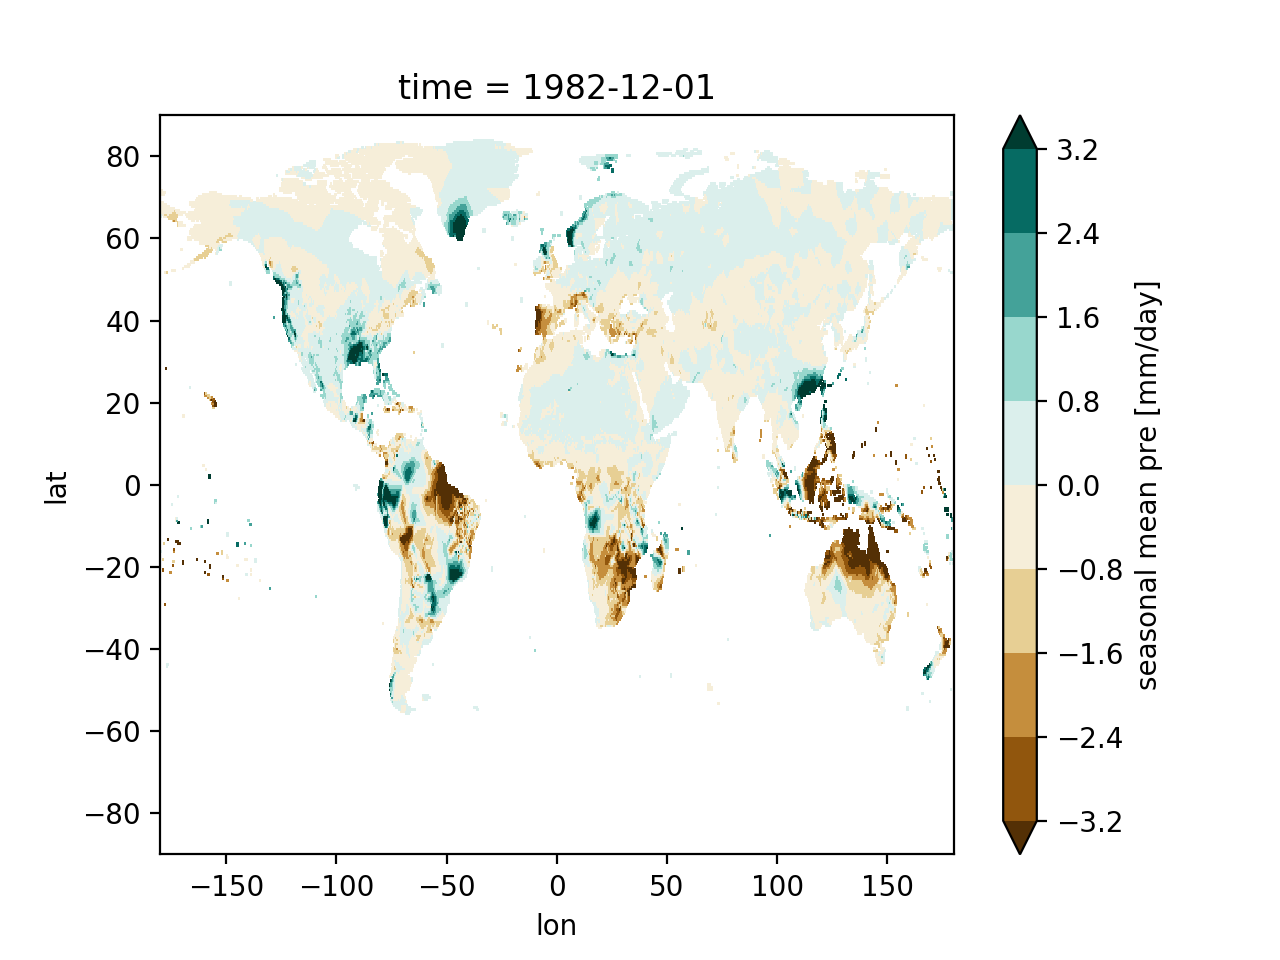

In [11]:
# following winter
daa.sel(time=f'{year_erupt}-12').pipe(lambda x: x/30.0).rename(f'seasonal mean {data_name} [{units}]')\
    .plot(robust=True, levels=10, cmap='BrBG')

<IPython.core.display.Javascript object>


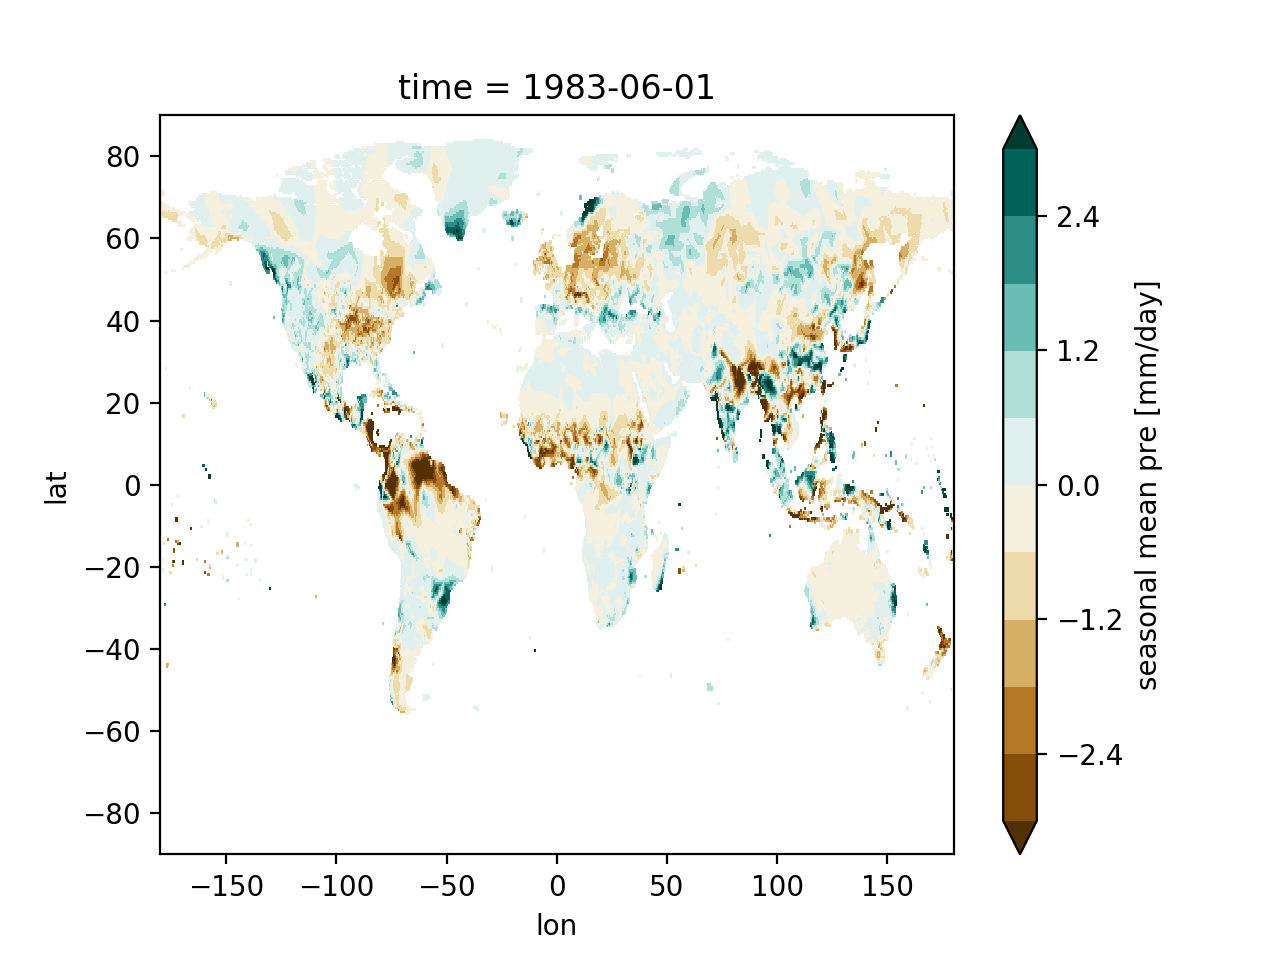

In [12]:
# next-year summer
daa.sel(time=f'{year_erupt+1}-06').pipe(lambda x: x/30.0).rename(f'seasonal mean {data_name} [{units}]')\
    .plot(robust=True, levels=10, cmap='BrBG')

<IPython.core.display.Javascript object>


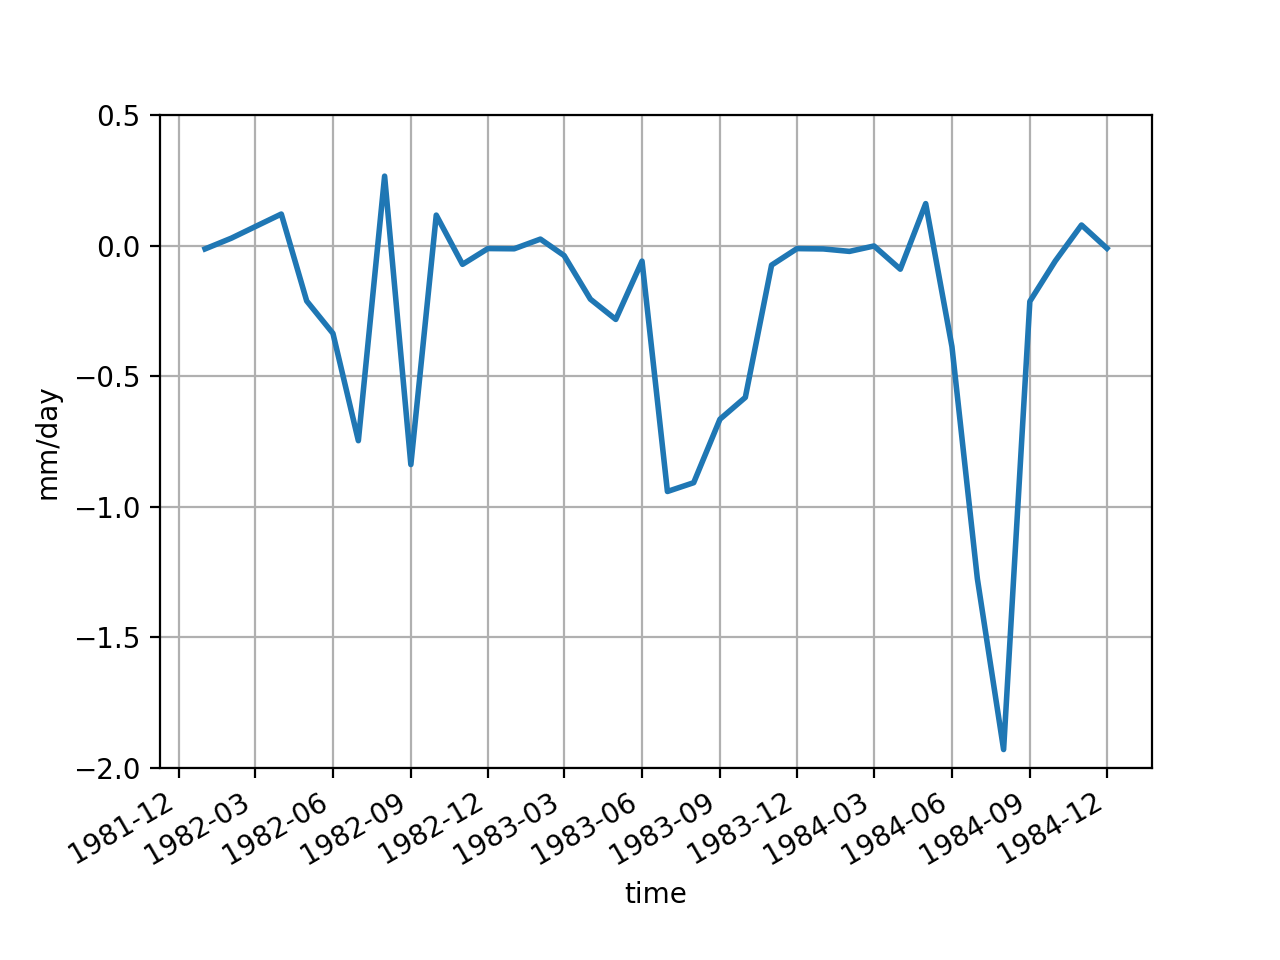

(-2, 0.5)

In [13]:
# Sahel rainfall time series
ts_ = ts.sel(time=years_after).groupby('time.month') \
    - ts.sel(time=years_before).groupby('time.month').mean('time') # anomaly
ts_.pipe(lambda x: x/30.).plot()
xticksmonth(range(3,13,3))
plt.grid(True)
plt.ylabel(units)
plt.ylim(-2,.5)

## Pinatubo 1991

In [14]:
year_erupt = 1991
years_before = slice(f'{year_erupt - 5}', f'{year_erupt - 1}')
years_after = slice(f'{year_erupt}', f'{year_erupt + 2}')
units = 'mm/day'

damean = da.sel(time=years_before).groupby('time.month').mean('time')
daa = da.sel(time=years_after).groupby('time.month') - damean
daa = daa.resample(time='QS-Dec').mean('time').isel(time=slice(1,None))
das['pre.anom.pinatubo'] = daa

<IPython.core.display.Javascript object>


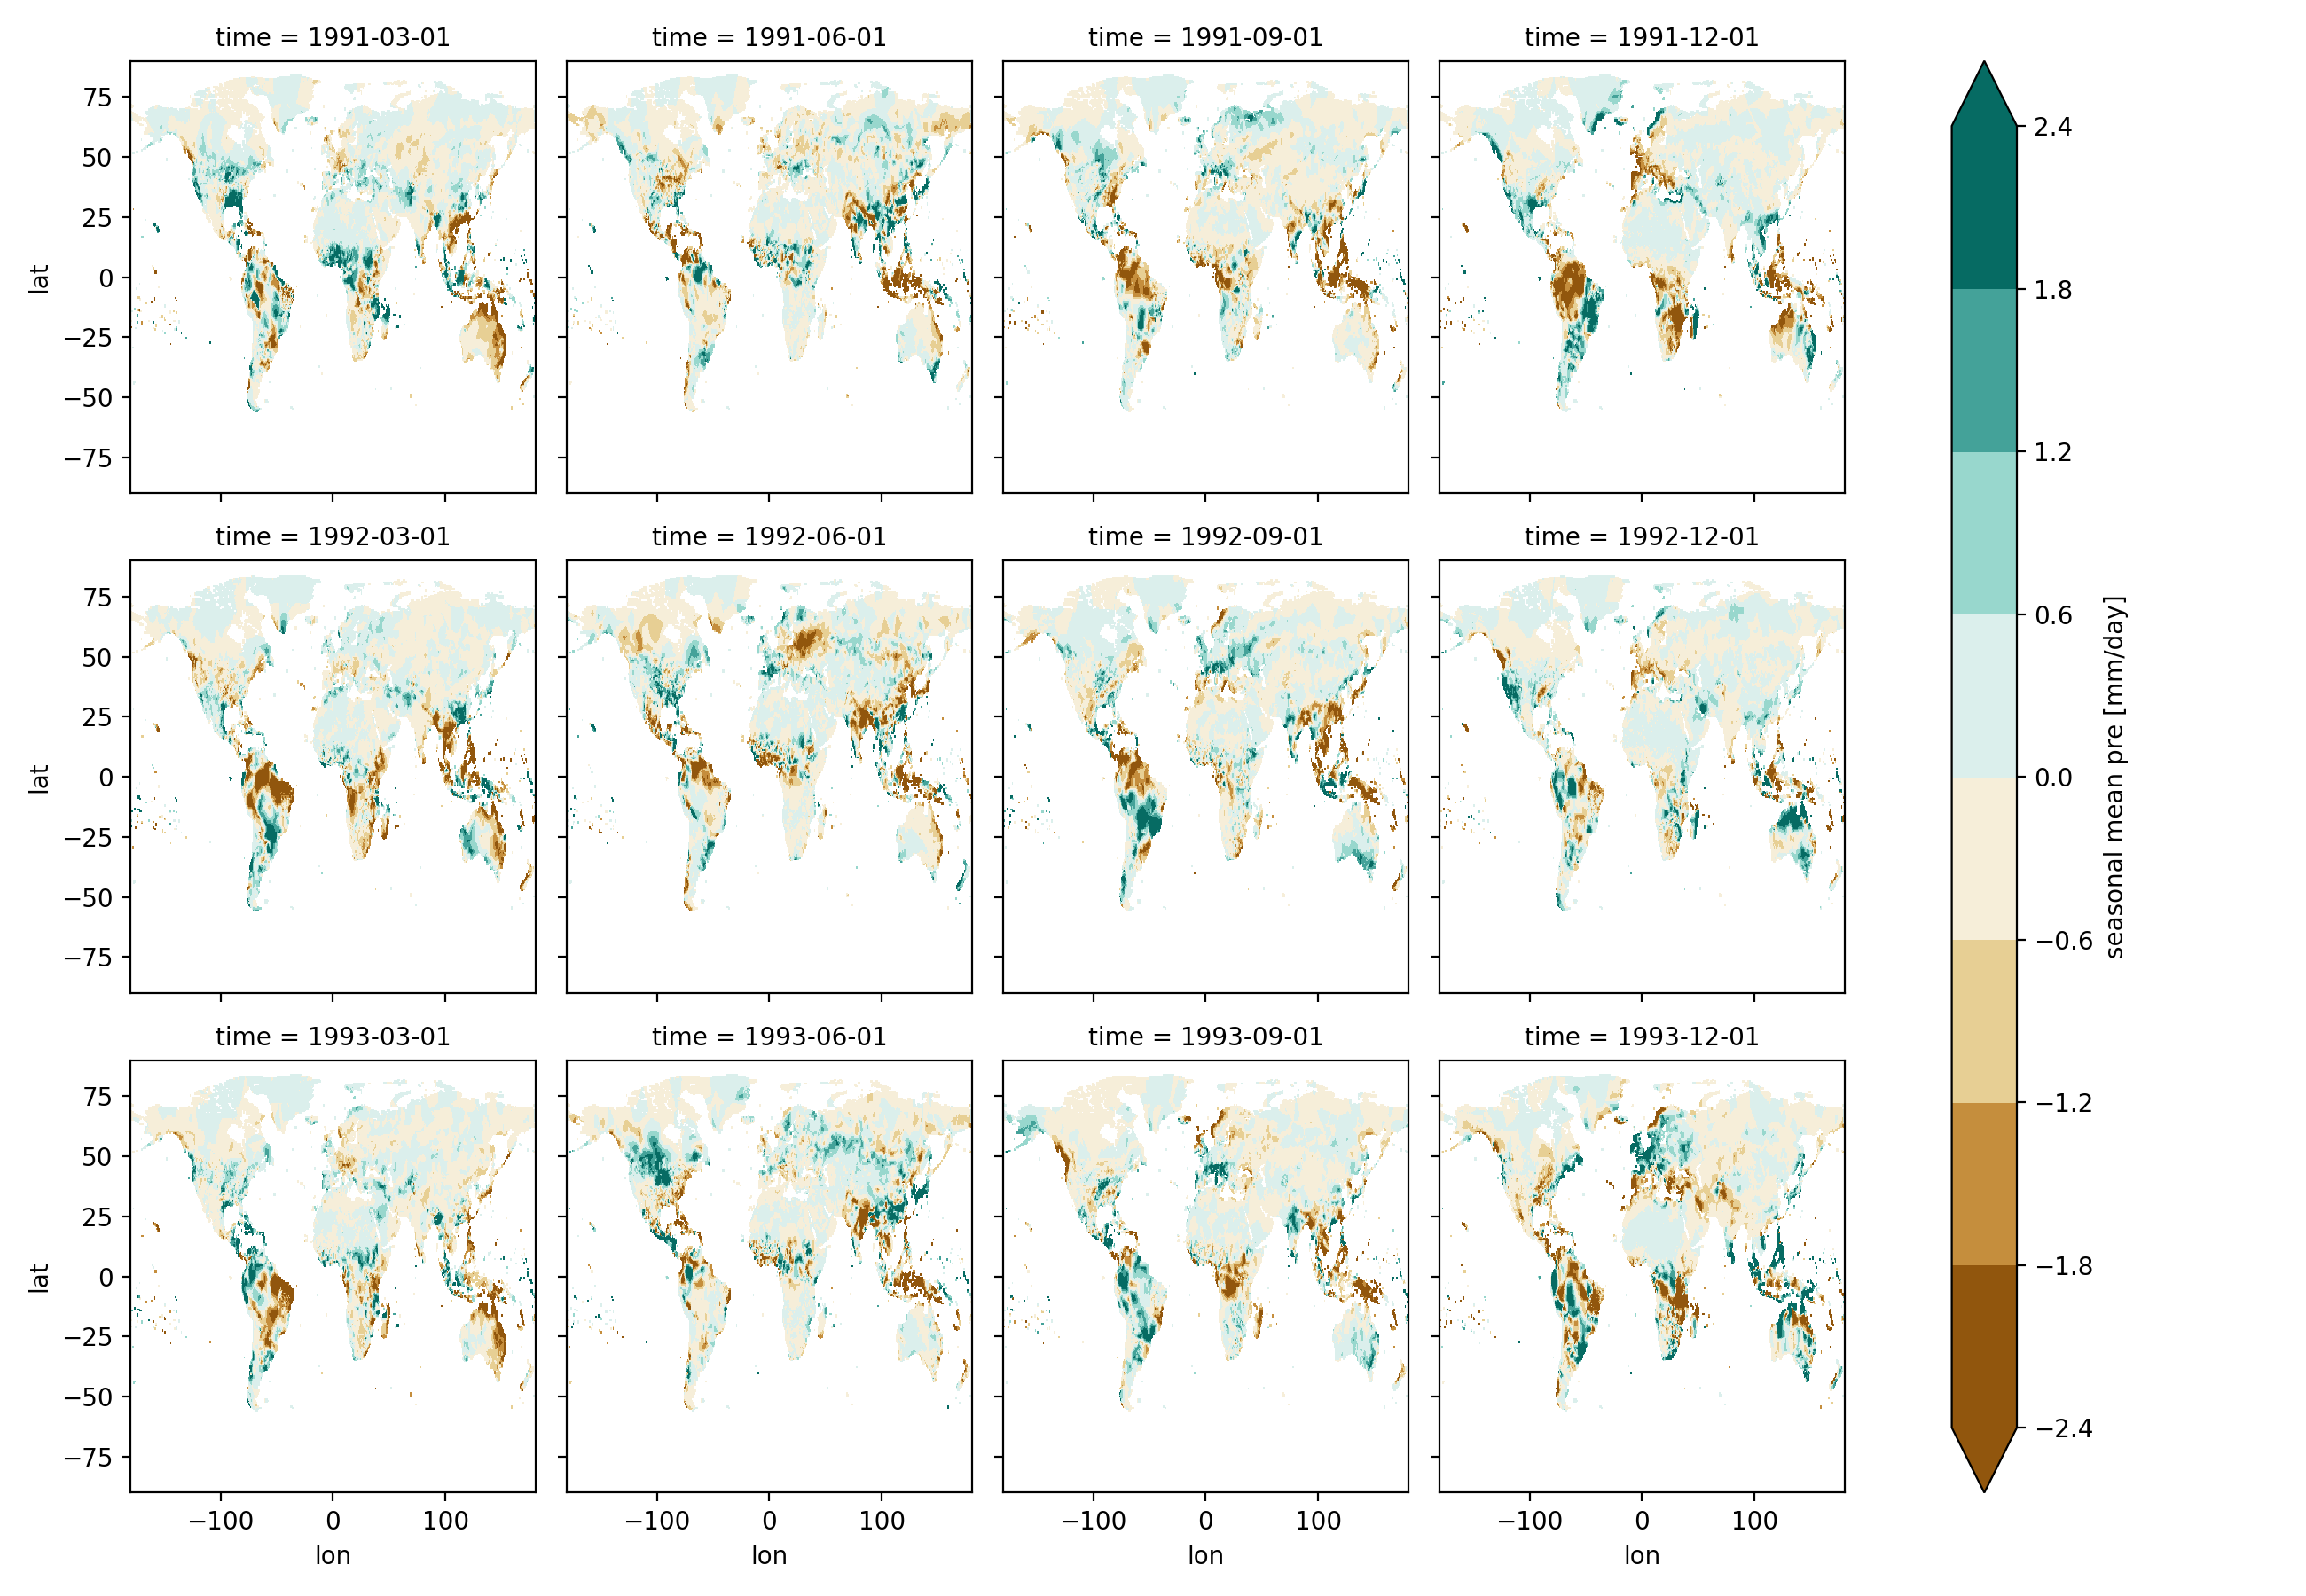

In [15]:
daa.pipe(lambda x: x/30.0).rename(f'seasonal mean {data_name} [{units}]')\
    .plot(col='time', col_wrap=4, robust=True, levels=10, cmap='BrBG')

<IPython.core.display.Javascript object>


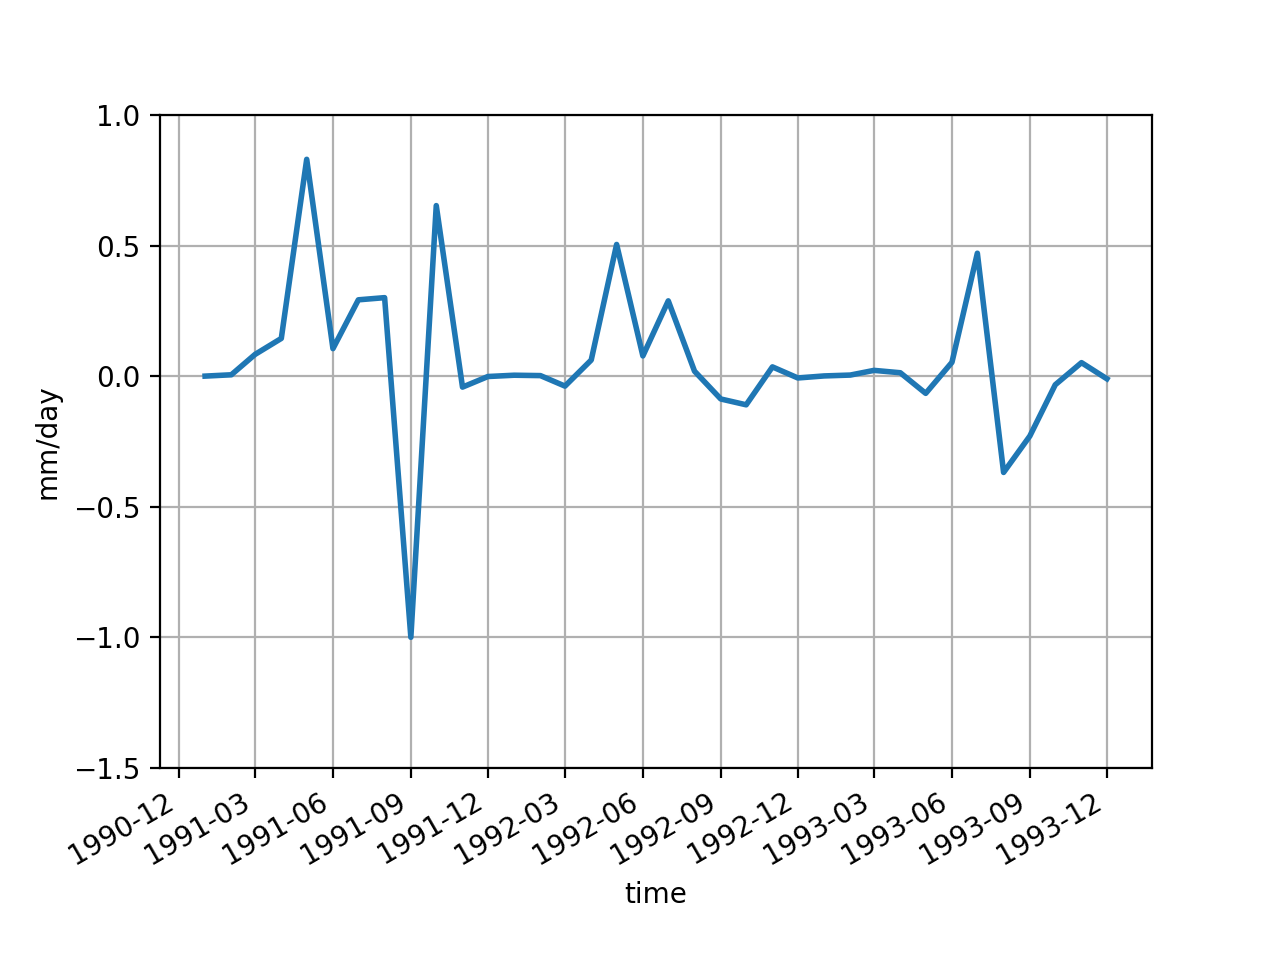

(-1.5, 1)

In [18]:
# Sahel rainfall time series
ts_ = ts.sel(time=years_after).groupby('time.month') \
    - ts.sel(time=years_before).groupby('time.month').mean('time') # anomaly
ts_.pipe(lambda x: x/30.).plot()
xticksmonth(range(3,13,3))
plt.grid(True)
plt.ylabel(units)
plt.ylim(-1.5,1)